<a href="https://colab.research.google.com/github/Michell203/mais-202/blob/main/MusicClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import json
import os, sys, scipy, pickle
import IPython
import IPython.display as ipd # to play the Audio Files
import tensorflow as tf
from glob import glob # allows us to list all files to a directory
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
import librosa # main package for working with Audio Data
import librosa.display

#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
sample_rate = 22050

data_frame = pd.read_csv('Data/features_3_sec.csv')
print(data_frame.head())
print(data_frame.shape)

data_frame = data_frame.drop(labels='filename',axis=1) #drop filename 
class_list = data_frame.iloc[:,-1]
#print(class_list)

            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.05

In [3]:
# Understanding the audio files
# This code is for being able to play the audio file
data, sr = librosa.load('Data/genres_original/blues/blues.00000.wav')
librosa.load('Data/genres_original/blues/blues.00000.wav', sr = sample_rate)
IPython.display.Audio(data, rate = sample_rate)

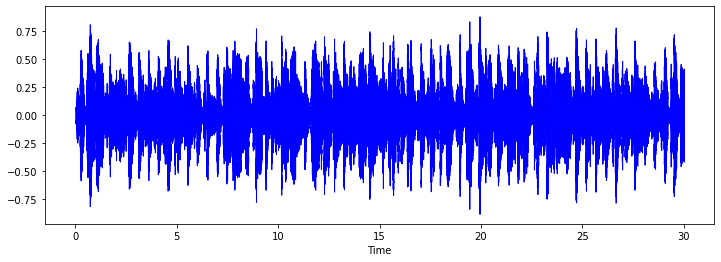

In [4]:
# Visualizing the audio files
# This code is for being able to visualize the wav files
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, color = "Blue")
plt.show()

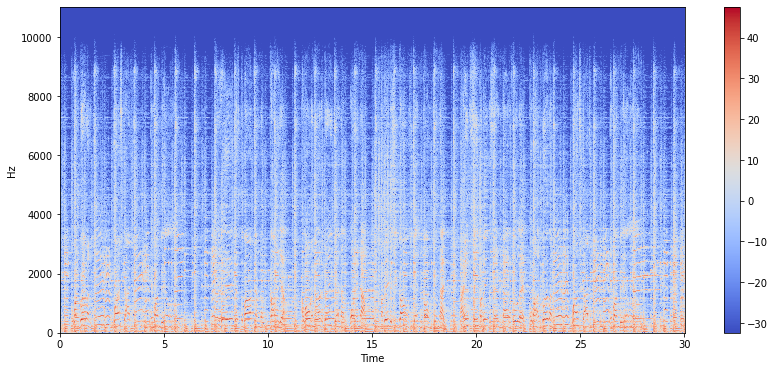

In [5]:
# Spectograms
# This is a visual way of representing signal loudness over time at various frequencies
gram = librosa.stft(data)
gram_db = librosa.amplitude_to_db(abs(gram))
plt.figure(figsize=(14,6))
librosa.display.specshow(gram_db, sr = sample_rate, x_axis='time',y_axis='hz')
plt.colorbar()

#This is just one of the ways we can visualize the audio

In [6]:
covertor = LabelEncoder() #change from text to machine readable file
y = covertor.fit_transform(class_list)

fit = StandardScaler()
X = fit.fit_transform(np.array(data_frame.iloc[:,:-1], dtype = float))

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)
#len(y_train)
#len(y_test)

In [7]:
def trainModel(model, epochs, optimizer):
  batch_size = 128
  model.compile(optimizer = optimizer,
                loss='sparse_categorical_crossentropy',
                metrics='accuracy'
                )
  return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs,
                   batch_size=batch_size)

In [8]:
def validate(history):
  print("Validation accuracy",max(history,history["val_accuracy"]))
  pd.DataFrame(history.history).plot(figsize=(12,6))

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation='softmax'),
])
print(model.summary())
model_history = trainModel(model=model, epochs=100, optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [10]:
model.save_weights('./model/weights.hdf5')
model.save('./saved_model')

INFO:tensorflow:Assets written to: ./saved_model\assets


INFO:tensorflow:Assets written to: ./saved_model\assets


In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128)
print("Test loss: ",test_loss)
print("\nBest test accuracy is: ",test_acc*100)

26/26 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.9093
Test loss:  0.4069770276546478

Best test accuracy is:  90.93114733695984


In [12]:
def predictFromAudio(wavFile):
  #TODO: transform the audio file into a readable array of info, then make a prediction and return the most probable genre 
  return ("Not done yet")

In [13]:
model.__call__(X_test)
print(X_test[0])

[ 0.          0.21052161 -0.30761481  0.62620711 -0.46610394  0.0027226
 -0.84709695 -0.3784085  -0.89433924 -0.1896773  -0.89964855  0.4682169
 -0.5661734   0.18987547  0.3301663  -0.57947659 -0.13904872  0.56721245
  0.99764466 -0.93591141  0.24062096 -1.01614686 -1.37011292 -0.72842123
  0.90468882 -0.72426499 -1.27045377 -0.26977429  0.53778634 -0.63808196
 -1.19984791 -1.00998624  0.4578442  -1.01755999 -1.51664786  1.08707426
  1.46174882 -0.13013734 -1.36466897 -0.52699676  0.38828167  0.08381605
 -0.87387628 -0.49620308  0.00233216 -0.39800695 -1.51652571 -0.64423967
  0.21015151  0.63558503 -1.19728339 -0.55909459  0.45305147  0.03121637
  0.22417055 -0.70728489  0.39441926 -0.7605883 ]
